<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/StateVectorVisualization_Transition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-aer

In [151]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from numpy import pi

In [152]:
# Qiskit Local Simulator 사용하기 위한 준비
from qiskit import Aer, execute

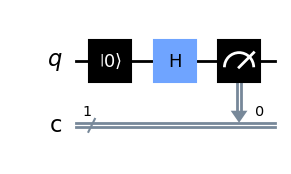

In [153]:
#qr = QuantumRegister(1, 'q')
#cr = ClassicalRegister(1, 'c')
#qc = QuantumCircuit(qr, cr)
qc = QuantumCircuit(1, 1)

#qc.reset(qr[0])
qc.reset(0)

#qc.h(qr[0])
qc.h(0)

#qc.measure(qr[0], cr[0])
qc.measure(0, 0)

qc.draw('mpl')

In [154]:
from qiskit.providers.jobstatus import JobStatus
import time

backend = Aer.get_backend('qasm_simulator')  #Local Qiskit Aer 시뮬레이터 사용

job = execute(qc, backend, shots=1024)
#job = backend.run(qc, shots=2048) # if you don’t pass a shots kwarg, it defaults to 1024

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(1)
###while

# grab a coffee! This can take up to a few minutes.
# once we break out of that while loop, we know our job is finished
print("Job status is", job.status() )

# 결과 출력
result = job.result()
counts = result.get_counts()
print(counts)

Job status is JobStatus.INITIALIZING
Job status is JobStatus.DONE
{'0': 521, '1': 503}


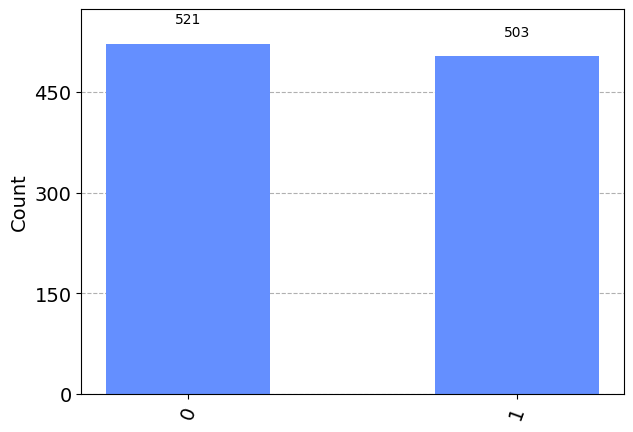

In [155]:
plot_histogram(data=counts)

In [156]:
# execute the quantum circuit
backend = Aer.get_backend(name='statevector_simulator') # the device to run on
result = backend.run(qc, shot=1024).result()
psi = result.get_statevector(experiment=qc)
print(psi)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


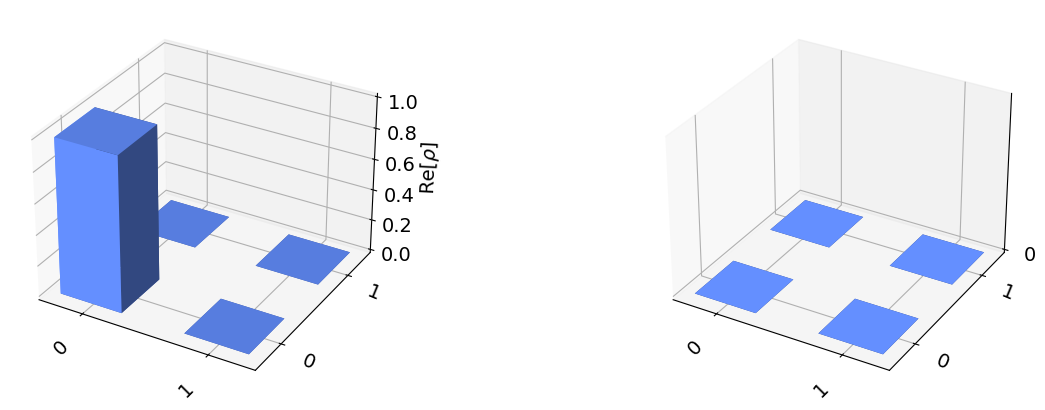

In [157]:
from qiskit.visualization import plot_state_city
plot_state_city(state=psi)

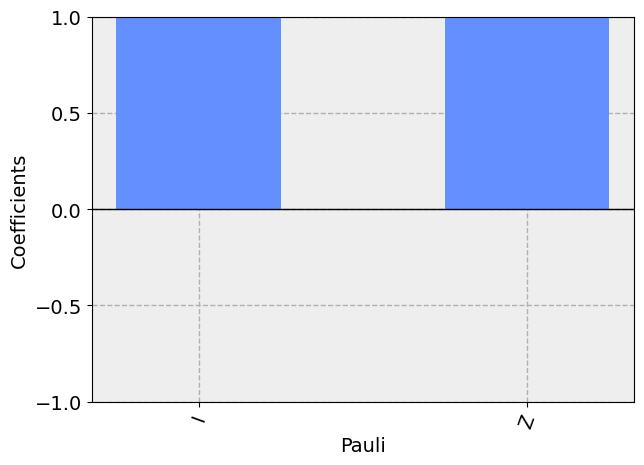

In [158]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(state=psi)

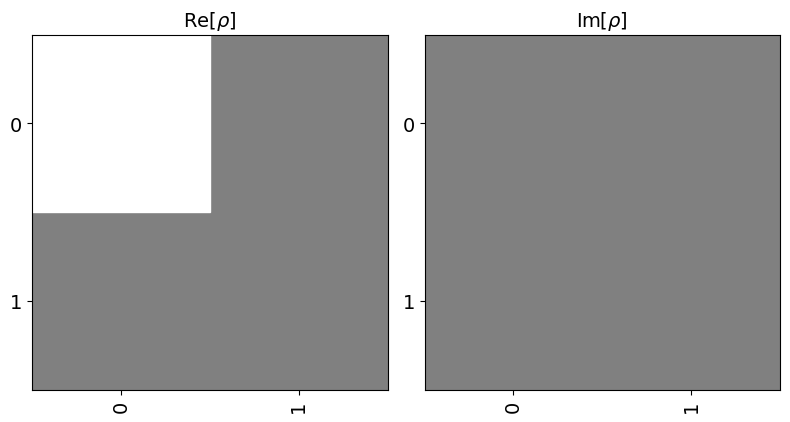

In [159]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(state=psi)

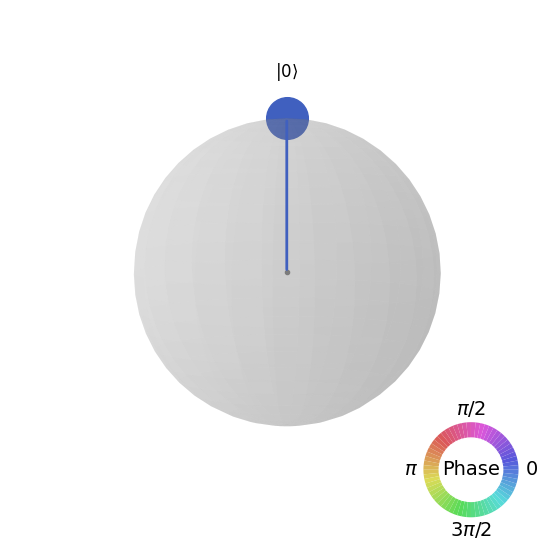

In [160]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(state=psi)

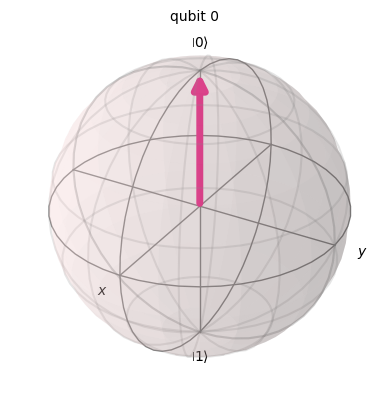

In [161]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state=psi)

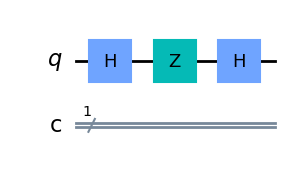

In [162]:
qc2 = QuantumCircuit(1, 1)
qc2.h(0)
qc2.z(0)
qc2.h(0)
#qc2.measure(0, 0)
qc2.draw('mpl')

In [163]:
# execute the quantum circuit
backend = Aer.get_backend(name='statevector_simulator') # the device to run on
result2 = backend.run(qc2, shot=1024).result()
psi2 = result2.get_statevector(experiment=qc2)
print(psi2)

Statevector([2.22044605e-16+6.123234e-17j, 1.00000000e+00-6.123234e-17j],
            dims=(2,))


In [164]:
from qiskit.visualization import visualize_transition
visualize_transition(qc2)

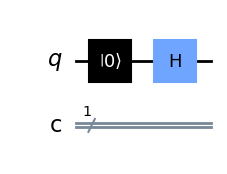

In [175]:
qc3 = QuantumCircuit(1, 1)
qc3.reset(0)
qc3.h(0)
#qc3.measure(0, 0) #측정하면 중첩상태 붕괴하여 '0' 또는 '1'이 나옴, 상태변화추적을 위해서 측정하지 말아야 함
qc3.draw('mpl')

In [176]:
# execute the quantum circuit
backend = Aer.get_backend(name='statevector_simulator') # the device to run on
result3 = backend.run(qc3, shot=1024).result()
psi3 = result3.get_statevector(experiment=qc3)
print(psi3)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


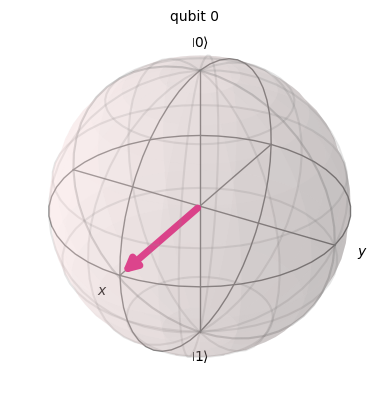

In [177]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state=psi3)

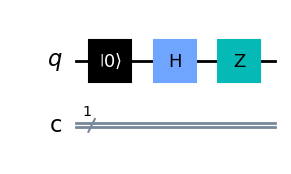

In [178]:
qc4 = QuantumCircuit(1, 1)
qc4.reset(0)
qc4.h(0)
qc4.z(0)
#qc4.measure(0, 0) #측정하면 중첩상태 붕괴하여 '0' 또는 '1'이 나옴, 상태변화추적을 위해서 측정하지 말아야 함
qc4.draw('mpl')


In [179]:
# execute the quantum circuit
backend = Aer.get_backend(name='statevector_simulator') # the device to run on
result4 = backend.run(qc4, shot=1024).result()
psi4 = result4.get_statevector(experiment=qc4)
print(psi4)

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


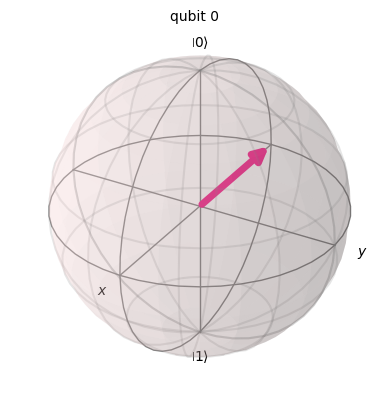

In [180]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state=psi4)

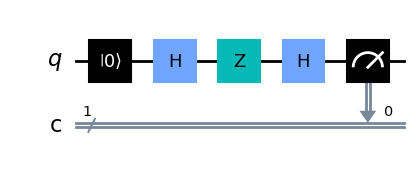

In [184]:
qc5 = QuantumCircuit(1, 1)
qc5.reset(0)
qc5.h(0)
qc5.z(0)
qc5.h(0)
qc5.measure(0, 0) #측정하면 중첩상태 붕괴하여 '0' 또는 '1'이 나옴, 상태변화추적을 위해서 측정하지 말아야 함
qc5.draw('mpl')

In [185]:
# execute the quantum circuit
backend = Aer.get_backend(name='statevector_simulator') # the device to run on
result5 = backend.run(qc5, shot=1024).result()
psi5 = result5.get_statevector(experiment=qc5)
print(psi5)

Statevector([0.+0.000000e+00j, 1.-6.123234e-17j],
            dims=(2,))


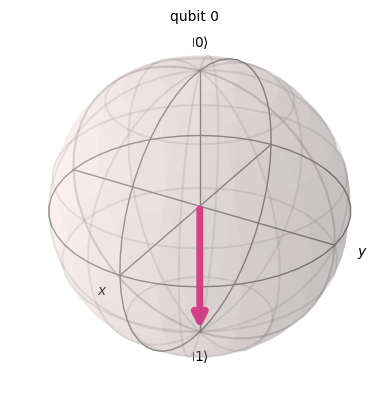

In [186]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state=psi5)